In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [18]:
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [19]:
raw_data = pd.read_csv("/content/data (1).csv")
raw_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [20]:
raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [22]:
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4600,70,2014-06-23 00:00:00,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0


In [23]:
x1 = raw_data.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis = 1) 
y = raw_data['price']

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1's
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an independent x
results = sm.OLS(y,x).fit()
# Print a summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          5.03e-235
Time:                        05:32:19   Log-Likelihood:                -66877.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4588   BIC:                         1.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.584e+06   6.85e+05      6.689      0.000    3.24e+06    5.93e+06
bedrooms      -5.804e+04   1.05e+04     -5.531      0.000   -7.86e+04   -3.75e+04
bathrooms       5.72e+04    1.7e+04      3.363      0.001    2.39e+04    9.05e+04
sqft_living     164.4116      9.779     16.813      0.000     145.241     183.582
sqft_lot         -0.6912      0.213     -3.250      0.001      -1.108      -0.274
floors         3.981e+04   1.87e+04      2.129      0.033    3143.011    7.65e+04
waterfront     3.553e+05   9.38e+04      3.789      0.000    1.71e+05    5.39e+05
view            4.57e+04    1.1e+04      4.167      0.000    2.42e+04    6.72e+04
condition      3.184e+04    1.3e+04      2.441      0.015    6269.622    5.74e+04
sqft_above       97.0378      9.714      9.989      0.000      77.993     116.082
sqft_basement    67.3738     13.661      4.932      0.000      40.591      94.157
yr_built      -2378.2101    341.615     -6.962      0.000   -3047.939   -1708.481
yr_renovated      6.5727      8.634      0.761      0.447     -10.355      23.500
==============================================================================
Omnibus:                    12845.801   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        601962895.545
Skew:                          35.530   Prob(JB):                         0.00
Kurtosis:                    1773.770   Cond. No.                     1.07e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.13e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
raw_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [25]:
raw_data[raw_data==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [26]:
zero_price = raw_data[raw_data['price']==0]
zero_price.describe().T


,count,mean,std,min,25%,50%,75%,max
price,49.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
bedrooms,49.0,3.979592,1.108486,1.0,3.0,4.0,5.0,6.00
bathrooms,49.0,2.698980,1.194584,1.0,2.0,2.5,3.5,6.25
sqft_living,49.0,2787.142857,1354.375625,720.0,1910.0,2600.0,3500.0,8020.00
sqft_lot,49.0,16453.306122,27739.227932,3500.0,6863.0,9000.0,13783.0,188200.00
floors,49.0,1.500000,0.520416,1.0,1.0,1.5,2.0,3.00
waterfront,49.0,0.061224,0.242226,0.0,0.0,0.0,0.0,1.00
view,49.0,0.795918,1.485760,0.0,0.0,0.0,0.0,4.00
condition,49.0,3.673469,0.826331,2.0,3.0,3.0,4.0,5.00
sqft_above,49.0,2295.714286,1337.148708,720.0,1310.0,1990.0,3020.0,8020.00


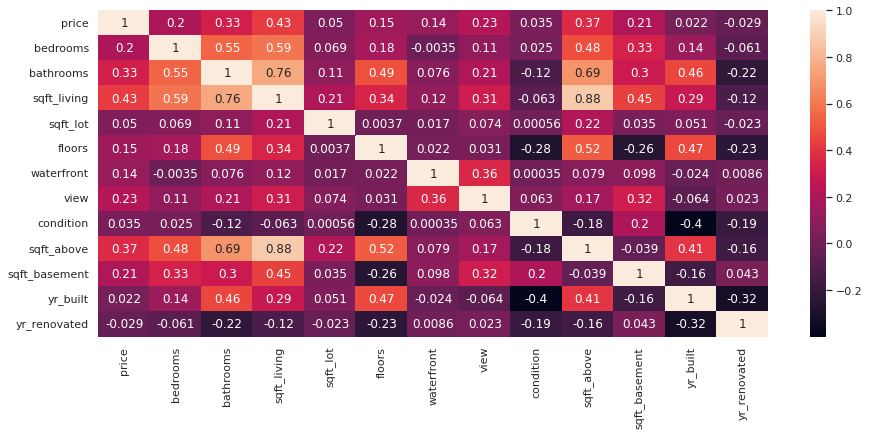

In [27]:
corr_matrix = raw_data.corr()

fig, ax = plt.subplots(figsize = (15,6))
sns.heatmap(corr_matrix, annot = True)
